![title](UCN ICI.png)

 #  <font color='#7E9BC0'> Suavización Exponencial Doble. </font>

<div class="alert alert-info"> </h4> **Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Adminitración de la Producción 2.**
</h4> </div>


<div class="alert alert-block alert-warning">

<b> **Autor:**</b> 
Este material es una recopilacion de trabajos de clases y proyectos realizados por Sergio Correa Santis. Si necestita mayor información o quiere utilizar este material en forma parcial o total, solo debe utilizar la correspondiente referencia o escribir a **sergio.correa@ucn.cl**.  
</div>

Documentación:
- Método de Holt, Statsmodels: [Holt](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.Holt.html)
- Método de Holt Fit, Statsmodels: [Holt.fit](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.Holt.fit.html#statsmodels.tsa.holtwinters.Holt.fit)

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

warnings.filterwarnings("ignore")

In [2]:
original = pd.read_excel('Data_1.xlsx')
df = original.copy()
df

,Periodo,Mes,Demanda
0,1,Ene,37.0
1,2,Feb,40.0
2,3,Mar,41.0
3,4,Abr,37.0
4,5,May,45.0
5,6,Jun,50.0
6,7,Jul,43.0
7,8,Ago,47.0
8,9,Sep,56.0
9,10,Oct,52.0


#  <font color='#7E9BC0'> Método de Holt. </font>

In [3]:
#Metodo de Holt
y_true=df['Demanda'][:12]

mod  = Holt(y_true).fit(smoothing_level=0.8, smoothing_slope=0.2,optimized=False)
pred = mod.forecast(3)
pred

12    55.993499
13    57.415616
14    58.837734
dtype: float64

In [4]:
mod.fittedvalues

0     40.000000
1     40.120000
2     42.524800
3     43.561792
4     39.519304
5     45.987717
6     51.923365
7     46.082757
8     48.261394
9     57.135298
10    54.888431
11    56.856909
dtype: float64

In [5]:
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.8,False
smoothing_slope,beta,0.2,False
initial_level,l.0,37.0,False
initial_slope,b.0,3.0,False


In [6]:
df['Holt']=mod.fittedvalues.append(pred)
df

,Periodo,Mes,Demanda,Holt
0,1,Ene,37.0,40.000000
1,2,Feb,40.0,40.120000
2,3,Mar,41.0,42.524800
3,4,Abr,37.0,43.561792
4,5,May,45.0,39.519304
5,6,Jun,50.0,45.987717
6,7,Jul,43.0,51.923365
7,8,Ago,47.0,46.082757
8,9,Sep,56.0,48.261394
9,10,Oct,52.0,57.135298


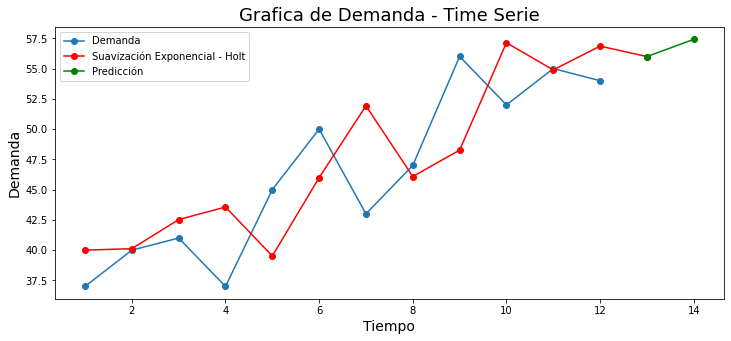

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['Holt'],'o-',color="red",label="Suavización Exponencial - Holt")
plt.plot(pred.shift(1),'o-',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

In [8]:
y_pred=df['Holt'][:12]
#MSE
mse=round(MSE(y_true, y_pred),2)
print("Mean Squared Error - MSE: ",mse)

#RMSE
rmse= round(math.sqrt(mse),2)
print("Root Mean Squared Error - RMSE: ",rmse)

#MAD.
mad = round(np.mean(np.absolute(y_true-y_pred)),2)
print("Mean Absolute Desviation - MAD: ",mad)

#MAPE
mape=round(np.mean(np.absolute(y_true-y_pred)/y_true),3)*100
print("Mean Percentage Error Absolute- MAPE: ",mape,"%")

Mean Squared Error - MSE:  22.95
Root Mean Squared Error - RMSE:  4.79
Mean Absolute Desviation - MAD:  3.87
Mean Percentage Error Absolute- MAPE:  8.5 %


#  <font color='#7E9BC0'> Método de Holt & Inicialization  </font>

In [9]:
#Inicializar las variables
X=np.asarray(df['Periodo'][:12]).reshape(-1, 1)
Y=np.asarray(df['Demanda'][:12]).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)

nivel=reg.intercept_[0]
pendiente=reg.coef_[0][0]

print("El nivel de inicialización es: ",nivel)
print("La pendiente de inicialización es: ",pendiente)

El nivel de inicialización es:  35.21212121212121
La pendiente de inicialización es:  1.7237762237762237


In [10]:
df = original.copy()

y_true=df['Demanda'][:12]

mod  = Holt(y_true).fit(smoothing_level=0.3, smoothing_slope=0.5,optimized=False,
                        initial_level=nivel, initial_slope=pendiente)
pred = mod.forecast(3)
df['Holt']=mod.fittedvalues.append(pred)
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.300000,False
smoothing_slope,beta,0.500000,False
initial_level,l.0,35.212121,False
initial_slope,b.0,1.723776,False


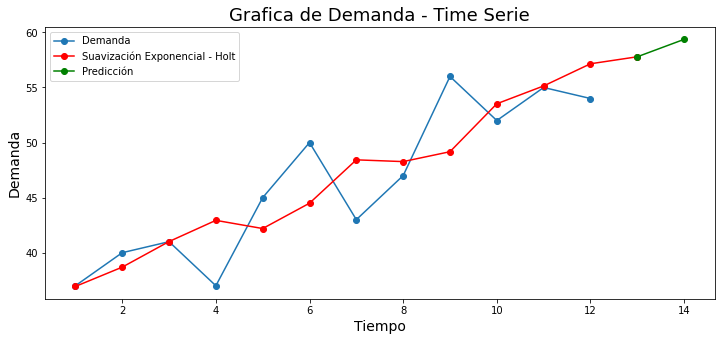

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['Holt'],'o-',color="red",label="Suavización Exponencial - Holt")
plt.plot(pred.shift(1),'o-',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

In [12]:
y_pred=df['Holt'][:12]
#MSE
mse=round(MSE(y_true, y_pred),2)
print("Mean Squared Error - MSE: ",mse)

#RMSE
rmse= round(math.sqrt(mse),2)
print("Root Mean Squared Error - RMSE: ",rmse)

#MAD.
mad = round(np.mean(np.absolute(y_true-y_pred)),2)
print("Mean Absolute Desviation - MAD: ",mad)

#MAPE
mape=round(np.mean(np.absolute(y_true-y_pred)/y_true),3)*100
print("Mean Percentage Error Absolute- MAPE: ",mape,"%")

Mean Squared Error - MSE:  13.77
Root Mean Squared Error - RMSE:  3.71
Mean Absolute Desviation - MAD:  2.83
Mean Percentage Error Absolute- MAPE:  6.1 %


#  <font color='#7E9BC0'> Método de Holt & Optimización  </font>

In [13]:
df = original.copy()

y_true=df['Demanda'][:12]
mod  = Holt(y_true).fit(optimized=True,use_brute=True)
pred = mod.forecast(3)
df['Holt']=mod.fittedvalues.append(pred)
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.315789,True
smoothing_slope,beta,0.315789,True
initial_level,l.0,37.000000,True
initial_slope,b.0,3.000000,True


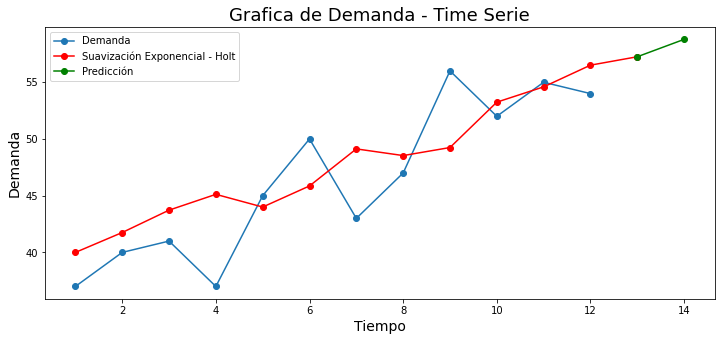

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['Holt'],'o-',color="red",label="Suavización Exponencial - Holt")
plt.plot(pred.shift(1),'o-',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

In [15]:
y_pred=df['Holt'][:12]
#MSE
mse=round(MSE(y_true, y_pred),2)
print("Mean Squared Error - MSE: ",mse)

#RMSE
rmse= round(math.sqrt(mse),2)
print("Root Mean Squared Error - RMSE: ",rmse)

#MAD.
mad = round(np.mean(np.absolute(y_true-y_pred)),2)
print("Mean Absolute Desviation - MAD: ",mad)

#MAPE
mape=round(np.mean(np.absolute(y_true-y_pred)/y_true),3)*100
print("Mean Percentage Error Absolute- MAPE: ",mape,"%")

Mean Squared Error - MSE:  16.42
Root Mean Squared Error - RMSE:  4.05
Mean Absolute Desviation - MAD:  3.28
Mean Percentage Error Absolute- MAPE:  7.3999999999999995 %
